<h2>es03: plain vanilla option pricing<h2>

In [1]:
import numpy as np

import matplotlib.pyplot as plt


An option is a kind of derivative, that is, a financial product whose value depends on some other asset. The so called European (or "plain vanilla") option is a contract, which allows the buyer ("holder") to purchase from or sell to the seller ("writer") an underlying asset at a price K at time T in the future.

If one calls the price of the asset S(t), it is evident that at any rate the holder may get a profit, either by buying from the writer the asset and immediately selling it on the market if S(T) > K  (profit = S(T)-K) or by purhcasing it from the market and selling it to the writer if S(T) < K (profit = K-S(T)). 

Therefore, a financial agent only will sell an option if it is well payed, i.e. if the price of the option at time t balances, on average, with the profit that is granted to the holder.

Under simplifying assumptions, (those of "ideal market"), the price of a financial asset undergoes variations which are well described by a "geometric brownian motion" model. That is, S(t) becomes a stocastic process whose differential is:





For comparison, the exact solution from Black and Sholes model has been calculated. The parameters are the same used for the simulation, since they  are written to file and read off by the following cells:

In [2]:
dirname = "exercices/output/dir03-1/"
filenames = ("price1step","priceNsteps")

def GetParamDictionary(filename):
    dictionary = {}
    with open(dirname + filename) as reader:
        for line in reader:
            string = line.split(' ')
            if string  [0].rstrip('\n') == "EndPar":
                break
            dictionary [string [0]] = string [1].rstrip ('\n')
             
    return dictionary
  
            
            
    
d = GetParamDictionary (filenames [0])
print (d)
                                 
#data = GetData (filenames[0], (0,1,2), skiplines = len(d) + 1)
#print (data)

{'InitialAssetPrice:': '100.000000', 'DeliveryTime:': '1.000000', 'StrikePrice:': '100.000000', 'RiskFreeRate:': '0.100000', 'Volatility:': '0.250000', 'FirstCol:': 'Call', 'SecondCol:': 'Put'}


In [3]:
#defining functions for calculating Black and Sholes analytic solution
from scipy.special import erf



def N(x):
    return 0.5 * (1. + erf(x / np.sqrt(2.)))

def Getd1 (S, K, r, sigma, T):
    return 1./(sigma * np.sqrt(T)) * (np.log(S / K) + (r + (sigma**2)/2.) * T)
    
def Getd2 (d1, sigma, T):
    return d1 - sigma * np.sqrt(T)

def Call (d1, d2, S, K, r, T):
    return S * N(d1) - K * np.exp(-r * T) * N(d2)

def Put (d1, d2, S, K, r, T):
    return S * (N(d1) - 1.) - K * np.exp(-r * T) * (N(d2) - 1.)


In [4]:
#compute expected values
def computeExpected ():
    S = float (d ['InitialAssetPrice:'])
    K = float (d ['StrikePrice:'])
    T = float (d ['DeliveryTime:'])
    r = float (d ['RiskFreeRate:'])
    sigma = float (d ['Volatility:'])

    d1 = Getd1 (S=S, K=K, r=r, sigma=sigma, T=T)
    d2 = Getd2 (d1, sigma=sigma, T=T)

    CallPrice = Call (d1, d2, S=S, K=K, r=r, T=T)
    PutPrice = Put (d1, d2, S=S, K=K, r=r, T=T)


    CallArray = np.ones(arrays [0].shape[0]) * CallPrice
    PutArray = np.ones(arrays [0].shape[0]) * PutPrice
    
    return CallArray, PutArray

the cell below plots the data from the "one shot" simulation

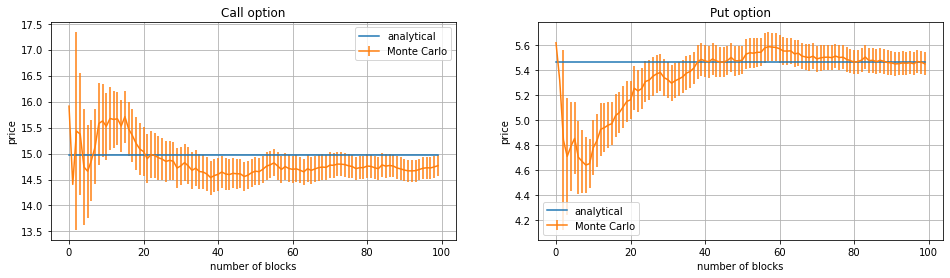

In [5]:
#load data
from itertools import islice

with open (dirname + filenames [0]) as f:  
    arrays = np.loadtxt(islice(f, len (d) + 1, None),
                                    unpack=True)




    
#initialize grid
fig, ax = plt.subplots (1,2)

fig.set_figwidth (16)
fig.set_figheight (4)


#plot expected values
CallArray, PutArray = computeExpected()

ax [0].plot (arrays [0], CallArray, label='analytical')
ax [1].plot (arrays [0], PutArray, label='analytical')

#plot data
for i, axis in enumerate (ax):
    axis.errorbar (arrays [0], arrays [1+ i*2], arrays [2 + i*2], label='Monte Carlo')
    axis.set_ylabel ("price")
    axis.set_xlabel ("number of blocks")
    axis.grid (True)
    axis.legend()
    
ax [0].set_title ("Call option")
ax [1].set_title ("Put option")



plt.show ()


the cell below plots data from discretized simulation

Text(0.5, 1.0, 'Put option')

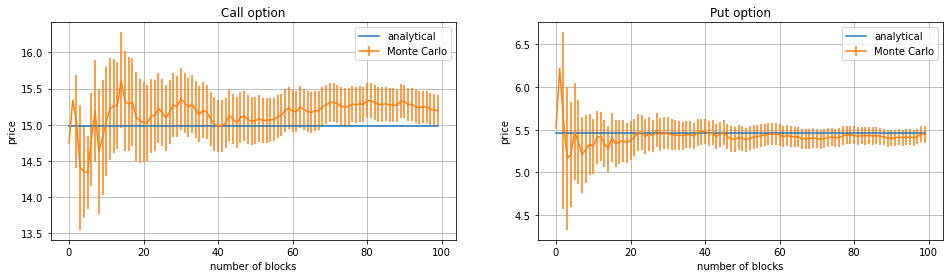

In [6]:
#plot data for discretized simulation
d = GetParamDictionary(filenames [1])

with open (dirname + filenames [1]) as f:  
    arrays = np.loadtxt(islice(f, len (d) + 1, None),
                                    unpack=True)

#initialize grid
fig, ax = plt.subplots (1,2)

fig.set_figwidth (16)
fig.set_figheight (4)

#plot expected values
CallArray, PutArray = computeExpected()

ax [0].plot (arrays [0], CallArray, label='analytical')
ax [1].plot (arrays [0], PutArray, label='analytical')



#plot data
for i, axis in enumerate (ax):
    axis.errorbar (arrays [0], arrays [1+ i*2], arrays [2 + i*2], label='Monte Carlo')
    axis.set_ylabel ("price")
    axis.set_xlabel ("number of blocks")
    axis.grid (True)
    axis.legend()
    
ax [0].set_title ("Call option")
ax [1].set_title ("Put option")

it can be observed that both algorithms (discretized and one shot) converge to the same value. This is due to the caharacteristics of a Wiener process